In [7]:
from IPython.display import display
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('../data/test_pred.csv')
display(df.columns)

np.random.seed(42)

Index(['title', 'total_game_hours_last_two_weeks', 'num_groups', 'orig_url',
       'num_badges', 'review_url', 'num_found_funny', 'review', 'date_updated',
       'num_workshop_items', 'date_posted', 'found_helpful_percentage',
       'num_voted_helpfulness', 'achievement_progress', 'profile_url',
       'num_found_helpful', 'steam_id_number', 'friend_player_level',
       'num_found_unhelpful', 'total_game_hours', 'username', 'num_guides',
       'rating', 'num_friends', 'num_screenshots', 'num_comments',
       'num_reviews', 'num_games_owned', 'pred_rfr_untuned',
       'pred_xgbr_untuned', 'pred_krr_untuned', 'pred_linr_untuned',
       'pred_lstm_untuned', 'pred_lstm2_untuned'],
      dtype='object')

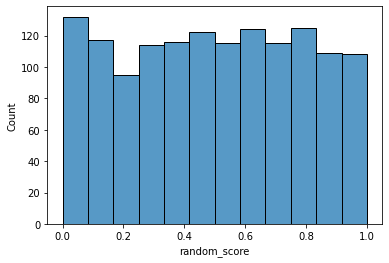

In [5]:
df['random_score'] = np.random.uniform(low=0, high=1, size=len(df))
df['random_diff'] = df.random_score - df.found_helpful_percentage
sns.histplot(data=df, x='random_score');

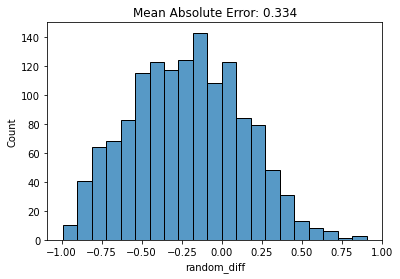

In [6]:
ax = sns.histplot(x=df['random_diff'])
ax.set_title('Mean Absolute Error: {:.3f}'.format(np.abs(df.random_diff).mean()));

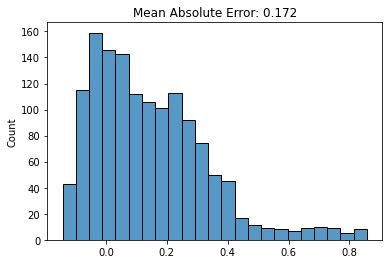

In [10]:
# use the most probable value as the regressed value

values = df.found_helpful_percentage
kernel = stats.gaussian_kde(values)
height = kernel.pdf(values)
mode_value = values[np.argmax(height)]
df['mpv'] = mode_value
ax2 = sns.histplot(x=df.mpv-df.found_helpful_percentage)
ax2.set_title('Mean Absolute Error: {:.3f}'.format(np.abs(df.mpv-df.found_helpful_percentage).mean()));